---
## 1️⃣ Data Loading & Initial Overview

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


In [2]:
# Load dataset directly from URL
URL_DATA = 'https://storage.data.gov.my/publicsafety/crime_district.parquet'
df = pd.read_parquet(URL_DATA)

print(f"📊 Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📊 Dataset loaded successfully!
Shape: 19,152 rows × 6 columns
Memory Usage: 5.71 MB


In [3]:
# Display first few rows
print("\n🔍 First 10 rows:")
df.head(10)


🔍 First 10 rows:


,state,district,category,type,date,crimes
0,Malaysia,All,assault,all,2016-01-01,22327
1,Malaysia,All,assault,all,2017-01-01,21366
2,Malaysia,All,assault,all,2018-01-01,16902
3,Malaysia,All,assault,all,2019-01-01,16489
4,Malaysia,All,assault,all,2020-01-01,13279
5,Malaysia,All,assault,all,2021-01-01,11495
6,Malaysia,All,assault,all,2022-01-01,10348
7,Malaysia,All,assault,all,2023-01-01,10453
8,Malaysia,All,assault,causing_injury,2016-01-01,5531
9,Malaysia,All,assault,causing_injury,2017-01-01,5024


In [7]:
# Display sample from different districts for better overview
print("\n🔍 Sample from Different Districts (Better View):")
# Group by district and sample 1 row from each, then take first 5
sample_df = df.groupby('district', group_keys=False).apply(lambda x: x.sample(1, random_state=42)).head(5)
sample_df[['state', 'district', 'date', 'category', 'type', 'crimes']]


🔍 Sample from Different Districts (Better View):


,state,district,date,category,type,crimes
18403,W.P. Kuala Lumpur,All,2019-01-01,assault,robbery_gang_armed,0
4520,Melaka,Alor Gajah,2016-01-01,assault,robbery_gang_unarmed,58
15832,Selangor,Ampang Jaya,2016-01-01,assault,robbery_gang_unarmed,380
9112,Perlis,Arau,2016-01-01,assault,robbery_gang_unarmed,6
3288,Kelantan,Bachok,2016-01-01,assault,robbery_gang_unarmed,8


In [10]:
# Display sample from different categories to see what's available
print("\n🔍 Sample from Different Categories:")
# Group by category and sample 1 row from each
sample_df = df.groupby('category', group_keys=False).apply(lambda x: x.sample(1, random_state=42))
sample_df['category']


🔍 Sample from Different Categories:


8422     assault
7363    property
Name: category, dtype: object

In [5]:
# Basic info
print("\n📋 Dataset Info:")
df.info()


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   state     19152 non-null  object
 1   district  19152 non-null  object
 2   category  19152 non-null  object
 3   type      19152 non-null  object
 4   date      19152 non-null  object
 5   crimes    19152 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 897.9+ KB


In [13]:
# Column names and types
print("\n📝 Columns:")
for col in df.columns:
    print(f"  • {col}: {df[col].dtype}")


📝 Columns:
  • state: object
  • district: object
  • category: object
  • type: object
  • date: object
  • crimes: int64


---
## 2️⃣ Structure Analysis

In [12]:
# Unique values per column
print("\n🔢 Unique Values Count:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"  • {col}: {unique_count:,}")


🔢 Unique Values Count:
  • state: 15
  • district: 160
  • category: 2
  • type: 13
  • date: 8
  • crimes: 1,341


In [13]:
# Unique states
print("\n🗺️ Unique States:")
states = df['state'].unique()
print(f"Total: {len(states)}")
print(sorted(states))


🗺️ Unique States:
Total: 15
['Johor', 'Kedah', 'Kelantan', 'Malaysia', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'W.P. Kuala Lumpur']


In [14]:
# Unique districts per state
print("\n🏘️ Districts per State:")
district_counts = df[df['district'] != 'All'].groupby('state')['district'].nunique().sort_values(ascending=False)
print(district_counts)


🏘️ Districts per State:
state
Sarawak              28
Sabah                20
Selangor             16
Perak                15
Johor                14
Kedah                12
Pahang               12
Kelantan             10
Negeri Sembilan       8
Terengganu            7
W.P. Kuala Lumpur     6
Pulau Pinang          5
Melaka                3
Perlis                3
Name: district, dtype: int64


In [15]:
# Crime categories and types
print("\n🚨 Crime Categories:")
print(df['category'].unique())

print("\n🔍 Crime Types:")
print(sorted(df['type'].unique()))


🚨 Crime Categories:
['assault' 'property']

🔍 Crime Types:
['all', 'break_in', 'causing_injury', 'murder', 'rape', 'robbery_gang_armed', 'robbery_gang_unarmed', 'robbery_solo_armed', 'robbery_solo_unarmed', 'theft_other', 'theft_vehicle_lorry', 'theft_vehicle_motorcar', 'theft_vehicle_motorcycle']


In [16]:
# Hierarchical structure check
print("\n🌳 Hierarchical Structure Analysis:")
print(f"\nRows with 'Malaysia' as state: {len(df[df['state'] == 'Malaysia']):,}")
print(f"Rows with 'All' as district: {len(df[df['district'] == 'All']):,}")
print(f"\n⚠️ AGGREGATION WARNING: 'All' rows are TOTALS - will cause double-counting!")


🌳 Hierarchical Structure Analysis:

Rows with 'Malaysia' as state: 112
Rows with 'All' as district: 1,680

⚠️ AGGREGATION WARNING: 'All' rows are TOTALS - will cause double-counting!


---
## 3️⃣ Data Quality Assessment

In [17]:
# Missing values
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
    print("✓ No missing values detected!")


🔍 Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
✓ No missing values detected!


In [18]:
# Zero crimes analysis
print("\n🔍 Zero Crime Entries:")
zero_crimes = df[df['crimes'] == 0]
print(f"Total rows with 0 crimes: {len(zero_crimes):,} ({len(zero_crimes)/len(df)*100:.2f}%)")

if len(zero_crimes) > 0:
    print("\nStates/Districts with zeros:")
    print(zero_crimes.groupby(['state', 'district'])['crimes'].count().head(10))


🔍 Zero Crime Entries:
Total rows with 0 crimes: 4,001 (20.89%)

States/Districts with zeros:
state  district           
Johor  All                     8
       Batu Pahat             16
       Iskandar Puteri        28
       Johor Bahru Selatan    12
       Johor Bahru Utara      15
       Kluang                 15
       Kota Tinggi            16
       Kulaijaya              16
       Ledang                 21
       Mersing                22
Name: crimes, dtype: int64


In [20]:
# Duplicate check
print("\n🔍 Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Total duplicates: {duplicates}")

if duplicates > 0:
    print("\nDuplicate examples:")
    print(df[df.duplicated(keep=False)].head(10))


🔍 Duplicate Rows:
Total duplicates: 0


In [21]:
# Statistical summary
print("\n📊 Crime Count Statistics:")
df['crimes'].describe()


📊 Crime Count Statistics:


count    19152.000000
mean       189.728018
std       1590.813293
min          0.000000
25%          1.000000
50%         12.000000
75%         66.000000
max      90028.000000
Name: crimes, dtype: float64

---
## 4️⃣ Temporal Analysis

In [22]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

print("\n📅 Temporal Coverage:")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Years covered: {sorted(df['year'].unique())}")
print(f"Total years: {df['year'].nunique()}")


📅 Temporal Coverage:
Date range: 2016-01-01 00:00:00 to 2023-01-01 00:00:00
Years covered: [np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023)]
Total years: 8


In [23]:
# Check if dates are all January 1st (yearly aggregates)
print("\n⚠️ Date Granularity Check:")
date_check = df['date'].dt.month.value_counts()
print(f"All dates are in month: {date_check.index.tolist()}")
day_check = df['date'].dt.day.value_counts()
print(f"All dates are on day: {day_check.index.tolist()}")
print("\n⚠️ WARNING: Data is YEARLY aggregates only (all dates = Jan 1st)")
print("   This limits time series forecasting capabilities!")


⚠️ Date Granularity Check:
All dates are in month: [1]
All dates are on day: [1]

⚠️ WARNING: Data is YEARLY aggregates only (all dates = Jan 1st)
   This limits time series forecasting capabilities!


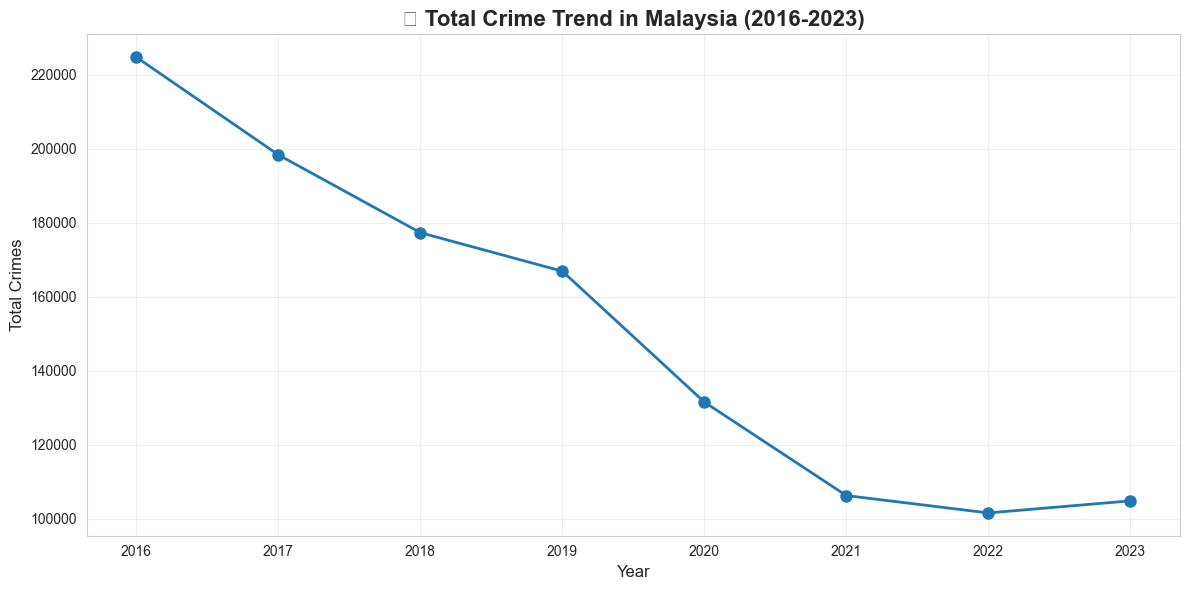


📊 Yearly Crime Totals:
   year  crimes
0  2016  224710
1  2017  198340
2  2018  177324
3  2019  166912
4  2020  131566
5  2021  106317
6  2022  101626
7  2023  104888


In [24]:
# Yearly crime trend (excluding 'All' aggregates)
df_districts = df[df['district'] != 'All'].copy()

yearly_crimes = df_districts.groupby('year')['crimes'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_crimes['year'], yearly_crimes['crimes'], marker='o', linewidth=2, markersize=8)
plt.title('📈 Total Crime Trend in Malaysia (2016-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Yearly Crime Totals:")
print(yearly_crimes)

---
## 5️⃣ Crime Distribution Analysis


🚨 Total Crimes by Category (2016-2023):
category
property    966365
assault     245318
Name: crimes, dtype: int64


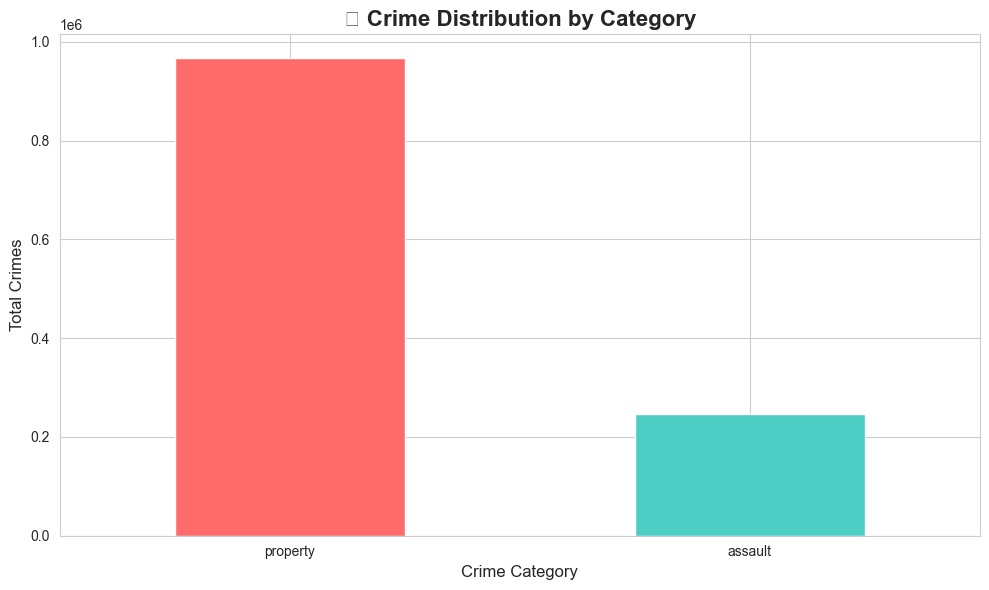

In [25]:
# Crime by category (excluding aggregates)
category_crimes = df_districts.groupby('category')['crimes'].sum().sort_values(ascending=False)

print("\n🚨 Total Crimes by Category (2016-2023):")
print(category_crimes)

plt.figure(figsize=(10, 6))
category_crimes.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('🚨 Crime Distribution by Category', fontsize=16, fontweight='bold')
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


🔝 Top 10 Crime Types:
type
theft_vehicle_motorcycle    162659
theft_other                 146660
break_in                    114734
theft_vehicle_motorcar       47281
robbery_gang_unarmed         44360
causing_injury               35608
robbery_solo_unarmed         26089
rape                         13868
theft_vehicle_lorry          11504
murder                        2462
Name: crimes, dtype: int64


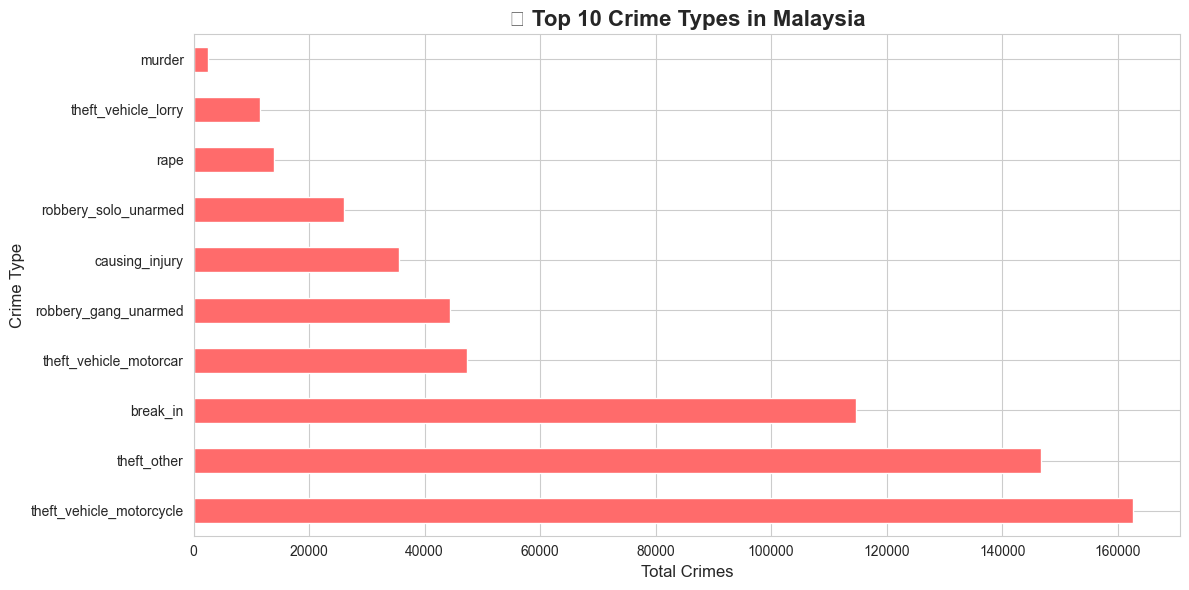

In [26]:
# Top 10 crime types
type_crimes = df_districts[df_districts['type'] != 'all'].groupby('type')['crimes'].sum().sort_values(ascending=False).head(10)

print("\n🔝 Top 10 Crime Types:")
print(type_crimes)

plt.figure(figsize=(12, 6))
type_crimes.plot(kind='barh', color='#FF6B6B')
plt.title('🔝 Top 10 Crime Types in Malaysia', fontsize=16, fontweight='bold')
plt.xlabel('Total Crimes', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.tight_layout()
plt.show()


🗺️ Top 10 States by Total Crime:
state
Selangor             315599
W.P. Kuala Lumpur    155402
Johor                131926
Kedah                 86370
Sarawak               86272
Sabah                 77888
Pulau Pinang          73306
Perak                 68704
Kelantan              50696
Negeri Sembilan       46784
Name: crimes, dtype: int64


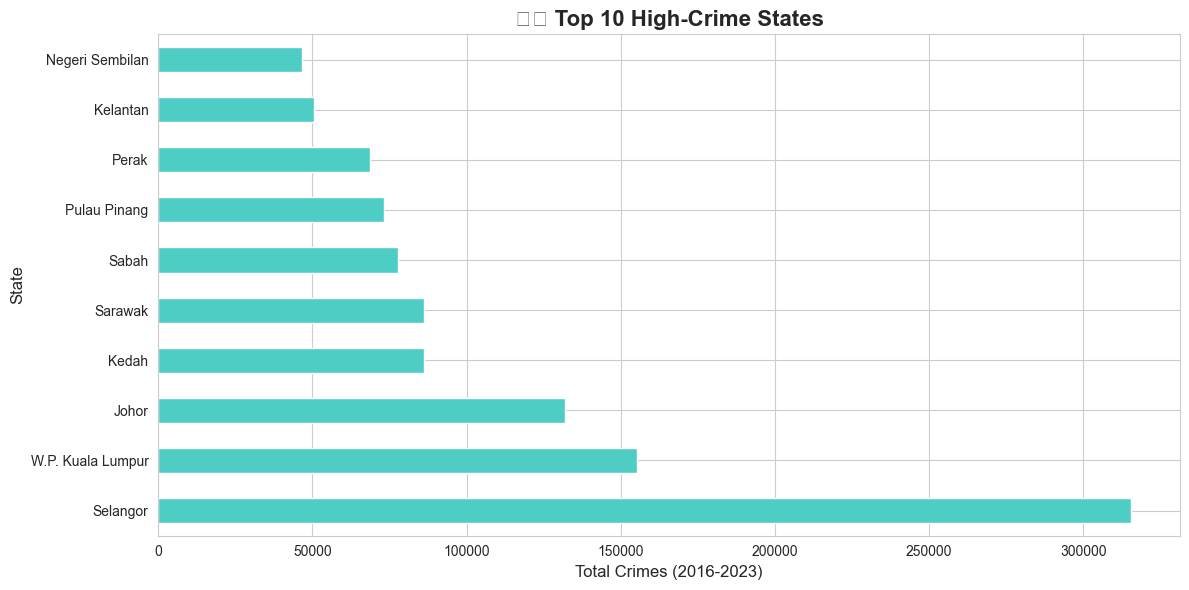

In [27]:
# Top 10 high-crime states (excluding 'All')
state_crimes = df_districts[df_districts['state'] != 'Malaysia'].groupby('state')['crimes'].sum().sort_values(ascending=False).head(10)

print("\n🗺️ Top 10 States by Total Crime:")
print(state_crimes)

plt.figure(figsize=(12, 6))
state_crimes.plot(kind='barh', color='#4ECDC4')
plt.title('🗺️ Top 10 High-Crime States', fontsize=16, fontweight='bold')
plt.xlabel('Total Crimes (2016-2023)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()


🏘️ Top 15 High-Crime Districts:
state              district             
Selangor           Petaling Jaya            46156
W.P. Kuala Lumpur  Dang Wangi               39960
Selangor           Kajang                   38500
                   Gombak                   38116
W.P. Kuala Lumpur  Sentul                   32912
Johor              Johor Bahru Selatan      32044
Selangor           Ampang Jaya              31386
W.P. Kuala Lumpur  Wangsa Maju              29930
Selangor           Klang Selatan            27700
Melaka             Melaka Tengah            27530
Perak              Ipoh                     26176
Kedah              Kuala Muda               25904
W.P. Kuala Lumpur  Brickfields              25390
Selangor           Serdang                  24717
Pulau Pinang       Seberang Perai Tengah    24358
Name: crimes, dtype: int64


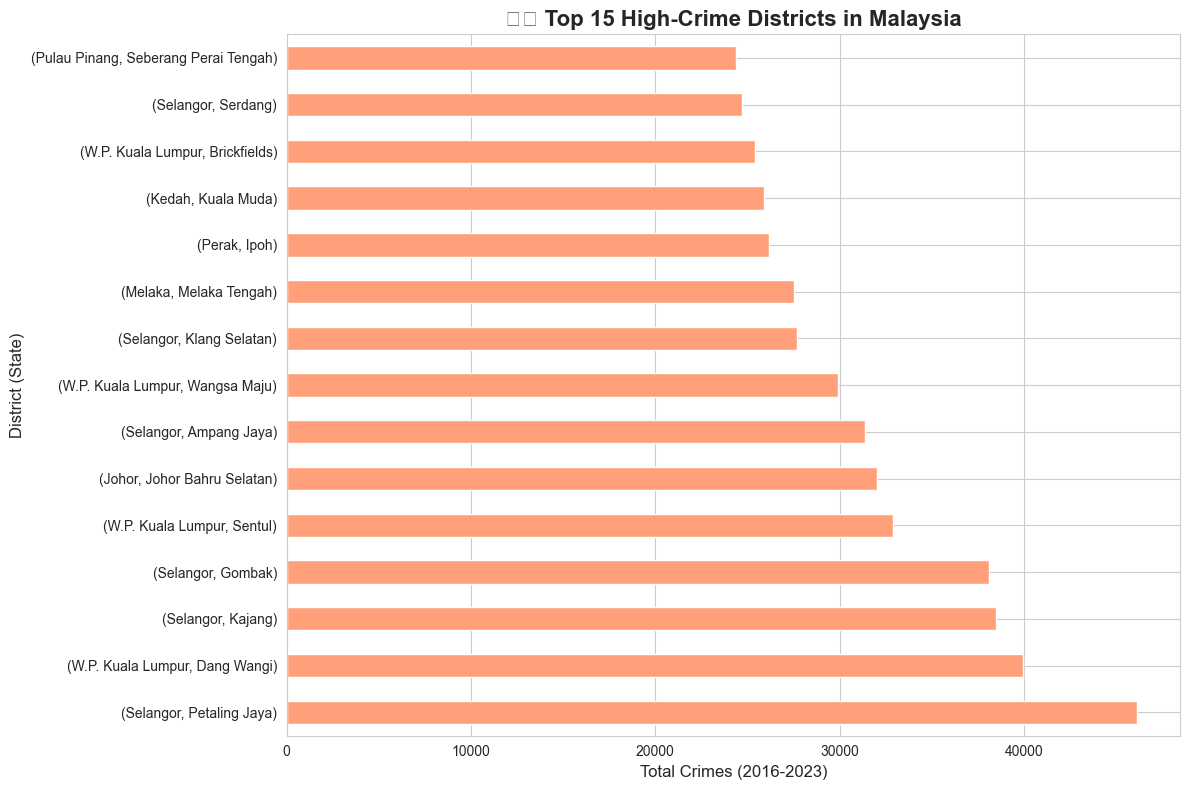

In [28]:
# Top 15 high-crime districts
district_crimes = df_districts[df_districts['district'] != 'All'].groupby(['state', 'district'])['crimes'].sum().sort_values(ascending=False).head(15)

print("\n🏘️ Top 15 High-Crime Districts:")
print(district_crimes)

plt.figure(figsize=(12, 8))
district_crimes.plot(kind='barh', color='#FFA07A')
plt.title('🏘️ Top 15 High-Crime Districts in Malaysia', fontsize=16, fontweight='bold')
plt.xlabel('Total Crimes (2016-2023)', fontsize=12)
plt.ylabel('District (State)', fontsize=12)
plt.tight_layout()
plt.show()

---
## 6️⃣ Hierarchical Structure Mapping

In [29]:
# Check if aggregates match district sums
print("\n🔍 Validation: Do state aggregates match district sums?\n")

# Example: Johor state in 2019, assault category
johor_state_total = df[(df['state'] == 'Johor') & 
                       (df['district'] == 'All') & 
                       (df['year'] == 2019) & 
                       (df['category'] == 'assault')]['crimes'].sum()

johor_districts_total = df[(df['state'] == 'Johor') & 
                           (df['district'] != 'All') & 
                           (df['year'] == 2019) & 
                           (df['category'] == 'assault') &
                           (df['type'] == 'all')]['crimes'].sum()

print(f"Johor State Total (2019, assault): {johor_state_total:,}")
print(f"Johor Districts Sum (2019, assault): {johor_districts_total:,}")
print(f"Match: {johor_state_total == johor_districts_total}")

if johor_state_total == johor_districts_total:
    print("\n✓ State aggregates = Sum of districts (hierarchy is correct!)")
else:
    print("\n⚠️ WARNING: State aggregates ≠ Sum of districts!")


🔍 Validation: Do state aggregates match district sums?

Johor State Total (2019, assault): 3,846
Johor Districts Sum (2019, assault): 1,923
Match: False

⚠️ WARNING: State aggregates ≠ Sum of districts!


In [ ]:
# Count rows by hierarchy level
print("\n📊 Row Distribution by Hierarchy Level:\n")

malaysia_level = len(df[df['state'] == 'Malaysia'])
state_level = len(df[(df['state'] != 'Malaysia') & (df['district'] == 'All')])
district_level = len(df[(df['state'] != 'Malaysia') & (df['district'] != 'All')])

print(f"National Level (Malaysia): {malaysia_level:,} rows")
print(f"State Level (All districts): {state_level:,} rows")
print(f"District Level (actual districts): {district_level:,} rows")
print(f"\nTotal: {malaysia_level + state_level + district_level:,} rows")

---
## 7️⃣ Key Findings & Recommendations

In [30]:
# Summary of findings
print("""
╔════════════════════════════════════════════════════════════════════╗
║                  🚨 DATA QUALITY FINDINGS                          ║
╚════════════════════════════════════════════════════════════════════╝

✅ POSITIVE FINDINGS:
  • No missing values
  • Consistent date format
  • Clean hierarchical structure
  • 8 years of data (2016-2023)

⚠️ ISSUES IDENTIFIED:

1. HIERARCHICAL AGGREGATION
   - 'All' rows contain TOTALS (state/national level)
   - Using these will cause DOUBLE-COUNTING
   - Solution: Remove 'All' district rows for ML models

2. TEMPORAL GRANULARITY
   - Data is YEARLY aggregates only (all dates = Jan 1st)
   - Limited forecasting capability (only 8 data points)
   - Solution: Consider interpolation or quarterly estimates

3. MISSING DATA PATTERNS
   - Iskandar Puteri has 0 crimes in 2016
   - Likely new district (established 2017?)
   - Solution: Handle as valid 0 or exclude 2016 for this district

4. SPARSE CRIME TYPES
   - Some crime types very rare (robbery_solo_armed: single digits)
   - Will cause issues in classification models
   - Solution: Group rare crime types or exclude from models

╔════════════════════════════════════════════════════════════════════╗
║                  📋 ETL RECOMMENDATIONS                            ║
╚════════════════════════════════════════════════════════════════════╝

NEXT STEPS:

1. CREATE CLEANED DATASET
   ✓ Remove rows where district = 'All'
   ✓ Remove rows where state = 'Malaysia'
   ✓ Keep only district-level data

2. FEATURE ENGINEERING
   ✓ Create year-over-year change %
   ✓ Calculate crime rates (if population data available)
   ✓ Create crime diversity index per district
   ✓ Flag high-risk districts (threshold-based)

3. PREPARE ML DATASETS
   ✓ Time series: aggregate by district/state for forecasting
   ✓ Clustering: feature matrix (avg_assault, avg_property, etc.)
   ✓ Classification: district features → risk level

4. ADDRESS FORECASTING LIMITATION
   ✓ Consider using state-level trends
   ✓ Explore external data (economic indicators, weather)
   ✓ Use ensemble methods for limited time points
""")


╔════════════════════════════════════════════════════════════════════╗
║                  🚨 DATA QUALITY FINDINGS                          ║
╚════════════════════════════════════════════════════════════════════╝

✅ POSITIVE FINDINGS:
  • No missing values
  • Consistent date format
  • Clean hierarchical structure
  • 8 years of data (2016-2023)

⚠️ ISSUES IDENTIFIED:

1. HIERARCHICAL AGGREGATION
   - 'All' rows contain TOTALS (state/national level)
   - Using these will cause DOUBLE-COUNTING
   - Solution: Remove 'All' district rows for ML models

2. TEMPORAL GRANULARITY
   - Data is YEARLY aggregates only (all dates = Jan 1st)
   - Limited forecasting capability (only 8 data points)
   - Solution: Consider interpolation or quarterly estimates

3. MISSING DATA PATTERNS
   - Iskandar Puteri has 0 crimes in 2016
   - Likely new district (established 2017?)
   - Solution: Handle as valid 0 or exclude 2016 for this district

4. SPARSE CRIME TYPES
   - Some crime types very rare (robbery_

---
## 🎯 Next Notebook: `02_ETL_Data_Preparation.ipynb`

**What we'll build:**
1. Data cleaning pipeline
2. Feature engineering functions
3. Export cleaned datasets for:
   - PowerBI dashboard
   - Time series forecasting
   - Clustering analysis
   - Classification models